<b>REGRESSION MODELS<b>

Importing packages needed

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

Reading data

In [23]:
data = pd.read_csv('kc_house_data.csv')
data.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Null values

In [24]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Dropping columns that mislead regression analysis

In [25]:
x = data.drop(columns=['date','id','price'],axis=1)
y = data['price']

Housing data statistics

In [26]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01
sqft_above,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03


Correlation matrix

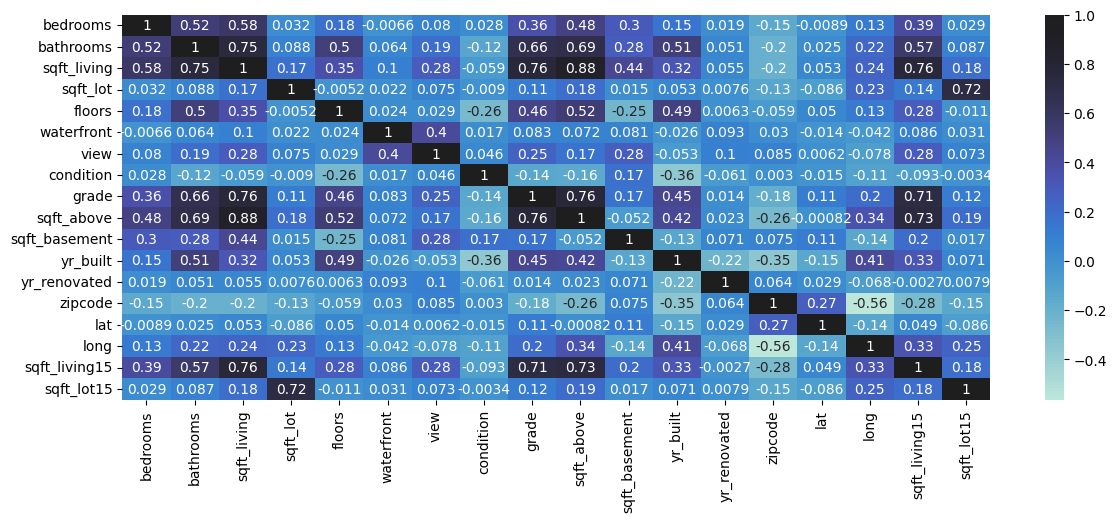

In [27]:
plt.figure(figsize=(14,5))
sns.heatmap(x.corr(),center=True,annot=True)
plt.show()

Skewness of each feature before transformations

In [28]:
x.skew()

bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

Skewed data will give worst results so transforming them accordingly

In [29]:
#Segregating features regarding to their skewness
#And then applying different transformations
high_skew = []
low_skew = []
for col in x.columns:
    if x[col].nunique()>2:
        if x[col].skew()>=0.6 or x[col].skew()<=1:
            low_skew.append(col)
        elif x[col].skew()>1:
            high_skew.append(col)
for each in high_skew:
    x[each] = np.cbrt(x[each])
for each in low_skew:
    if each!='long':
        x[each] = np.log(x[each]+1)
    else:
        x['long'] = x['long']

Skewness of each feature after transformations

In [30]:
x.skew()

bedrooms         -0.475489
bathrooms        -0.251960
sqft_living      -0.034727
sqft_lot          0.962893
floors            0.368674
waterfront       11.385108
view              2.971756
condition         0.607265
grade             0.201039
sqft_above        0.254034
sqft_basement     0.484603
yr_built         -0.495100
yr_renovated      4.549034
zipcode           0.404858
lat              -0.489935
long              0.885053
sqft_living15     0.206964
sqft_lot15        0.967255
dtype: float64

Distributions of each feature

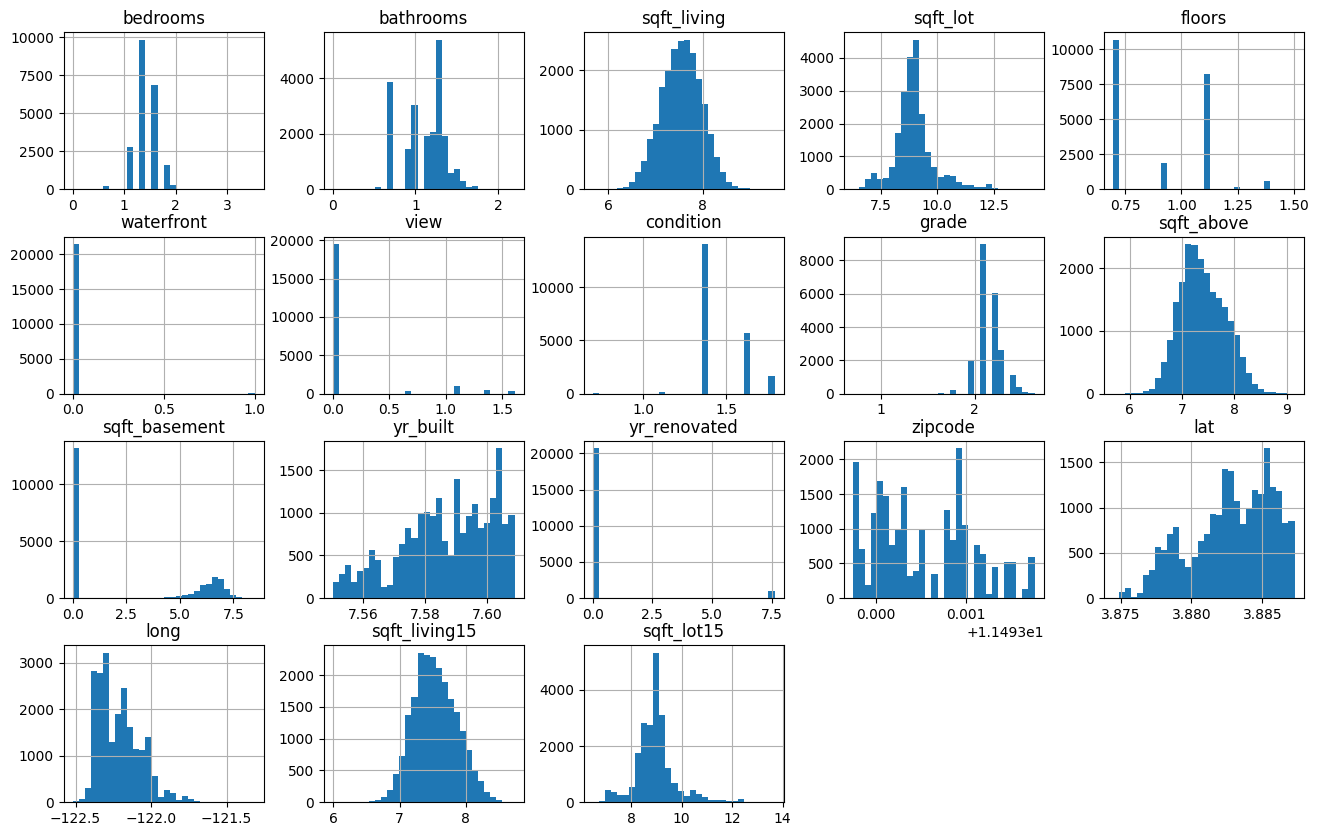

In [ ]:
x.hist(bins=30,figsize=(16,10),layout=(4,5))
plt.show()

Train-test split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Ordinary Least Squares(Linear Regression) with statistics

In [33]:
model = sm.OLS(y_train,x_train,hasconst='add')
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1523.
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:43:30   Log-Likelihood:            -2.0754e+05
No. Observations:               15129   AIC:                         4.151e+05
Df Residuals:                   15111   BIC:                         4.152e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.013e+05   1.15e+04     -8.769

Correlation and Note[2] in OLS analysis indicated strong correlations among independent features 

Bagging(Random Forest). RF doesn't need scaling. 

In [40]:
rfparam = {'n_estimators':[100,30,40,50],'max_depth':[5,10,15],'max_features':['sqrt']}
rfgscv = GridSearchCV(RandomForestRegressor(),scoring='r2',cv=5,param_grid=rfparam,return_train_score=True)
rfgscv.fit(x_train,y_train)
rf_test = x_test

Even if we got best results with OLS(Linear Reg), it might overfit on unseen data. So Simple LR is not suggestible. Applying few regularization for penalizing them in different ways to acquire best results. 

In [41]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Performing GridSearchCV to know performance over various combinations

In [42]:
rparam = {'max_iter':[10000],'alpha':[0.05,0.1,0.01,0.5,0.2,0.001,0.005]}
rgscv = GridSearchCV(Ridge(),scoring='r2',cv=5,param_grid=rparam,return_train_score=True)
lparam = {'max_iter':[10000],'alpha':[0.05,0.1,0.01,0.5,0.2,0.001,0.005]}
lgscv = GridSearchCV(Lasso(),scoring='r2',cv=5,param_grid=lparam,return_train_score=True)
enparam = {'max_iter':[10000],'alpha':[0.05,0.1,0.01,0.5,0.2,0.001,0.005],'l1_ratio':[0.5,0.1,0.3,0.7]}
engscv = GridSearchCV(ElasticNet(),scoring='r2',cv=5,param_grid=enparam,return_train_score=True)
rgscv.fit(x_train,y_train),lgscv.fit(x_train,y_train),engscv.fit(x_train,y_train)

(GridSearchCV(cv=5, estimator=Ridge(),
              param_grid={'alpha': [0.05, 0.1, 0.01, 0.5, 0.2, 0.001, 0.005],
                          'max_iter': [10000]},
              return_train_score=True, scoring='r2'),
 GridSearchCV(cv=5, estimator=Lasso(),
              param_grid={'alpha': [0.05, 0.1, 0.01, 0.5, 0.2, 0.001, 0.005],
                          'max_iter': [10000]},
              return_train_score=True, scoring='r2'),
 GridSearchCV(cv=5, estimator=ElasticNet(),
              param_grid={'alpha': [0.05, 0.1, 0.01, 0.5, 0.2, 0.001, 0.005],
                          'l1_ratio': [0.5, 0.1, 0.3, 0.7],
                          'max_iter': [10000]},
              return_train_score=True, scoring='r2'))

Best R2-scores and parameters on training set

In [43]:
print("<---------SCORES AND PARAMETERS SUMMARY--------->")
print("<---Ridge regularization (R2-score) : ",rgscv.best_score_)
print("<---Lasso regularization (R2-score) : ",lgscv.best_score_)
print("<---ElasticNet Regularization (R2-score) : ",engscv.best_score_)
print("<---Random Forest (Bagging technique) (R2-score) : ",rfgscv.best_score_)
print("\n<---Ridge's best parameters : ",rgscv.best_params_)
print("<---Lasso's best parameters : ",lgscv.best_params_)
print("<---ElasticNet's best parameters : ",engscv.best_params_)
print("<---Random Forest's best parameters : ",rfgscv.best_params_)


<---------SCORES AND PARAMETERS SUMMARY--------->
<---Ridge regularization (R2-score) :  0.6346013708297373
<---Lasso regularization (R2-score) :  0.63460032494982
<---ElasticNet Regularization (R2-score) :  0.6346189939286215
<---Random Forest (Bagging technique) (R2-score) :  0.8657169991044412

<---Ridge's best parameters :  {'alpha': 0.5, 'max_iter': 10000}
<---Lasso's best parameters :  {'alpha': 0.5, 'max_iter': 10000}
<---ElasticNet's best parameters :  {'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 10000}
<---Random Forest's best parameters :  {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50}


Predictions and scores on test data

In [46]:
l_pred = lgscv.predict(x_test)
rf_pred = rfgscv.predict(rf_test)
en_pred = engscv.predict(x_test)
r_pred = rgscv.predict(x_test)
print("Ridge (R2-score) : ",r2_score(y_test,r_pred))
print("Lasso (R2-score) : ",r2_score(y_test,l_pred))
print("ElasticNet (R2-score) : ",r2_score(y_test,en_pred))
print("Random Forest (R2-score) : ",r2_score(y_test,rf_pred))

Ridge (R2-score) :  0.6405050751821579
Lasso (R2-score) :  0.6405042172927876
ElasticNet (R2-score) :  0.6405162293455262
Random Forest (R2-score) :  0.8538326655617815


Boosting technique - eXtreme Gradient Boosting(XGBoost)

In [45]:
xparam = {'n_estimators':[None,30,50,70],'learning_rate':[0.5,0.001,0.01,0.1,0.005,0.2]}
xgscv = GridSearchCV(XGBRegressor(),param_grid=xparam,cv=5,return_train_score=True)
xgscv.fit(x_train,y_train)
xgbp = xgscv.predict(x_test)
print("<---BEST SCORE AND PARAMETERS ON TRAINING SET--->")
print("XGBoost (R2-score) : ",xgscv.best_score_)
print("XGBoost's best parameters : ",xgscv.best_params_)
print("<---XGBoost on test set--->")
print("XGBoost's (r2_score) : ",r2_score(y_test,xgbp))

<---BEST SCORE AND PARAMETERS ON TRAINING SET--->
XGBoost (R2-score) :  0.8844155565429318
XGBoost's best parameters :  {'learning_rate': 0.1, 'n_estimators': None}
<---XGBoost on test set--->
XGBoost's (r2_score) :  0.8757117809515559
